In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<AxesSubplot: xlabel='Date Time'>

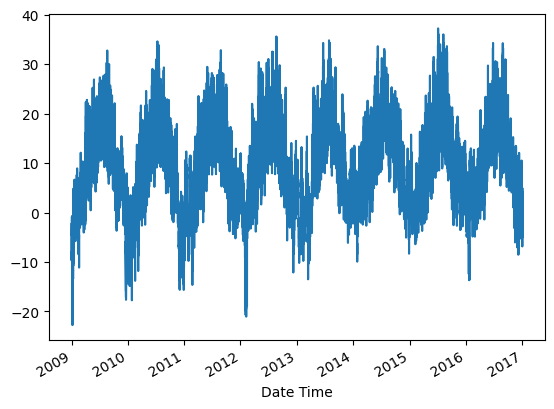

In [7]:
temp = df['T (degC)']
temp.plot()

In [8]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [10]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2022-10-04 12:56:29.073823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 33.4750 - root_mean_squared_error: 5.7858

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 4ms/step - loss: 33.4152 - root_mean_squared_error: 5.7806 - val_loss: 1.9552 - val_root_mean_squared_error: 1.3983
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 3.3668 - root_mean_squared_error: 1.8349

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 3.3623 - root_mean_squared_error: 1.8337 - val_loss: 0.6950 - val_root_mean_squared_error: 0.8337
Epoch 3/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.9968 - root_mean_squared_error: 0.9984

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.9954 - root_mean_squared_error: 0.9977 - val_loss: 0.5281 - val_root_mean_squared_error: 0.7267
Epoch 4/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.7262 - root_mean_squared_error: 0.8522

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7263 - root_mean_squared_error: 0.8522 - val_loss: 0.5270 - val_root_mean_squared_error: 0.7259
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6811 - root_mean_squared_error: 0.8253

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6809 - root_mean_squared_error: 0.8252 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6673 - root_mean_squared_error: 0.8169 - val_loss: 0.5000 - val_root_mean_squared_error: 0.7071
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6604 - root_mean_squared_error: 0.8127 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6540 - root_mean_squared_error: 0.8087 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038
Epoch 9/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6511 - root_mean_squared_error: 0.8069

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 0.4904 - val_root_mean_squared_error: 0.7003
Epoch 10/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6485 - root_mean_squared_error: 0.8053

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6485 - root_mean_squared_error: 0.8053 - val_loss: 0.4881 - val_root_mean_squared_error: 0.6986


In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [15]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 3s 1ms/step


,Train Predictions,Actuals
0,-9.816865,-9.67
1,-9.665010,-9.17
2,-8.821731,-8.10
3,-7.380939,-7.66
4,-7.298609,-7.04
...,...,...
59995,6.259222,6.07
59996,7.211851,9.88
59997,12.516950,13.53
59998,16.035042,15.43


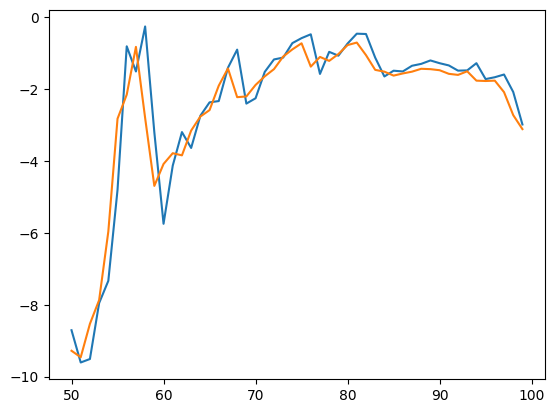

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [17]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 1s 1ms/step


,Val Predictions,Actuals
0,15.464756,14.02
1,13.216575,13.67
2,13.012153,12.27
3,11.438663,11.19
4,10.345942,10.85
...,...,...
4995,17.385052,18.27
4996,17.457653,17.85
4997,17.242361,16.65
4998,15.867507,15.85


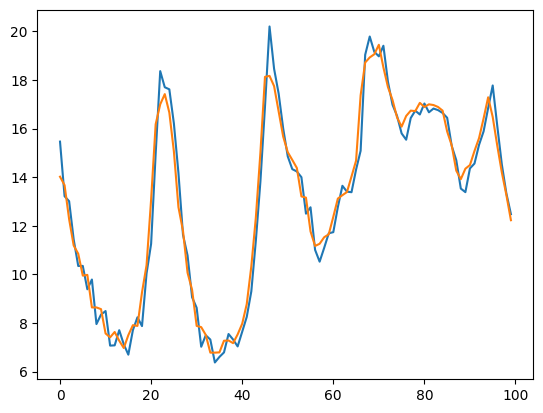

In [18]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [19]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,14.384775,13.99
1,13.209397,13.46
2,12.835732,12.93
3,12.427981,12.43
4,11.978838,12.17
...,...,...
5081,-1.074783,-0.98
5082,-1.486817,-1.40
5083,-1.688442,-2.75
5084,-3.286742,-2.89


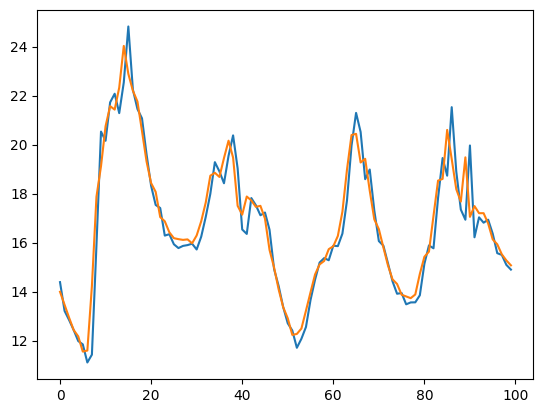

In [20]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [21]:
# Part 2

In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

159/159 [==============================] - 0s 1ms/step


(      Predictions  Actuals
 0       14.384775    13.99
 1       13.209397    13.46
 2       12.835732    12.93
 3       12.427981    12.43
 4       11.978838    12.17
 ...           ...      ...
 5081    -1.074783    -0.98
 5082    -1.486817    -1.40
 5083    -1.688442    -2.75
 5084    -3.286742    -2.89
 5085    -3.111764    -3.93
 
 [5086 rows x 2 columns],
 0.6253431199639636)

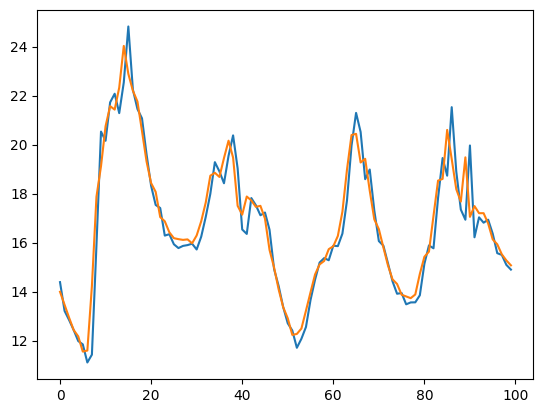

In [23]:
plot_predictions1(model1, X_test1, y_test1)

In [24]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [26]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1841/1875 [============================>.] - ETA: 0s - loss: 8.9227 - root_mean_squared_error: 2.9871

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 8.7845 - root_mean_squared_error: 2.9639 - val_loss: 0.9320 - val_root_mean_squared_error: 0.9654
Epoch 2/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.9865 - root_mean_squared_error: 0.9932

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.9845 - root_mean_squared_error: 0.9922 - val_loss: 0.6213 - val_root_mean_squared_error: 0.7883
Epoch 3/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.7427 - root_mean_squared_error: 0.8618

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7431 - root_mean_squared_error: 0.8620 - val_loss: 0.5551 - val_root_mean_squared_error: 0.7450
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6865 - root_mean_squared_error: 0.8286

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6867 - root_mean_squared_error: 0.8287 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 5/10
1821/1875 [============================>.] - ETA: 0s - loss: 0.6736 - root_mean_squared_error: 0.8207

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6717 - root_mean_squared_error: 0.8196 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7060
Epoch 6/10
1825/1875 [============================>.] - ETA: 0s - loss: 0.6659 - root_mean_squared_error: 0.8160

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6651 - root_mean_squared_error: 0.8156 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7025
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6618 - root_mean_squared_error: 0.8135 - val_loss: 0.4946 - val_root_mean_squared_error: 0.7033
Epoch 8/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.6615 - root_mean_squared_error: 0.8133

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6615 - root_mean_squared_error: 0.8133 - val_loss: 0.4894 - val_root_mean_squared_error: 0.6996
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6594 - root_mean_squared_error: 0.8120 - val_loss: 0.4907 - val_root_mean_squared_error: 0.7005
Epoch 10/10
1835/1875 [============================>.] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8101

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6566 - root_mean_squared_error: 0.8103 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980


In [27]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 31.1104 - root_mean_squared_error: 5.5777

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 30.9796 - root_mean_squared_error: 5.5659 - val_loss: 0.9303 - val_root_mean_squared_error: 0.9645
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 1.4865 - root_mean_squared_error: 1.2192

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 1.4833 - root_mean_squared_error: 1.2179 - val_loss: 0.5820 - val_root_mean_squared_error: 0.7629
Epoch 3/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.8000 - root_mean_squared_error: 0.8944

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7989 - root_mean_squared_error: 0.8938 - val_loss: 0.5143 - val_root_mean_squared_error: 0.7171
Epoch 4/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.6846 - root_mean_squared_error: 0.8274

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6839 - root_mean_squared_error: 0.8270 - val_loss: 0.5058 - val_root_mean_squared_error: 0.7112
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6577 - root_mean_squared_error: 0.8110 - val_loss: 0.5094 - val_root_mean_squared_error: 0.7137
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6489 - root_mean_squared_error: 0.8056

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.4927 - val_root_mean_squared_error: 0.7019
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6447 - root_mean_squared_error: 0.8029 - val_loss: 0.4940 - val_root_mean_squared_error: 0.7029
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6425 - root_mean_squared_error: 0.8016 - val_loss: 0.4989 - val_root_mean_squared_error: 0.7063
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6395 - root_mean_squared_error: 0.7997 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 10/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.6383 - root_mean_squared_error: 0.7990

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6381 - root_mean_squared_error: 0.7988 - val_loss: 0.4905 - val_root_mean_squared_error: 0.7003


In [30]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [31]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [32]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [33]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [34]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [35]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [36]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [37]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [38]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [39]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 35.3023 - root_mean_squared_error: 5.9416

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 4ms/step - loss: 35.3023 - root_mean_squared_error: 5.9416 - val_loss: 3.7710 - val_root_mean_squared_error: 1.9419
Epoch 2/10
1855/1875 [============================>.] - ETA: 0s - loss: 4.2602 - root_mean_squared_error: 2.0640

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 4.2403 - root_mean_squared_error: 2.0592 - val_loss: 1.7666 - val_root_mean_squared_error: 1.3291
Epoch 3/10
1857/1875 [============================>.] - ETA: 0s - loss: 1.7038 - root_mean_squared_error: 1.3053

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 1.6986 - root_mean_squared_error: 1.3033 - val_loss: 0.9357 - val_root_mean_squared_error: 0.9673
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 1.0407 - root_mean_squared_error: 1.0202

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 1.0400 - root_mean_squared_error: 1.0198 - val_loss: 0.7128 - val_root_mean_squared_error: 0.8443
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7955 - root_mean_squared_error: 0.8919

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.7956 - root_mean_squared_error: 0.8920 - val_loss: 0.5695 - val_root_mean_squared_error: 0.7547
Epoch 6/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6385 - root_mean_squared_error: 0.7991

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6392 - root_mean_squared_error: 0.7995 - val_loss: 0.4708 - val_root_mean_squared_error: 0.6861
Epoch 7/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.5715 - root_mean_squared_error: 0.7560

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5714 - root_mean_squared_error: 0.7559 - val_loss: 0.4415 - val_root_mean_squared_error: 0.6644
Epoch 8/10
1857/1875 [============================>.] - ETA: 0s - loss: 0.5442 - root_mean_squared_error: 0.7377

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5452 - root_mean_squared_error: 0.7384 - val_loss: 0.4189 - val_root_mean_squared_error: 0.6472
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5324 - root_mean_squared_error: 0.7297 - val_loss: 0.4216 - val_root_mean_squared_error: 0.6493
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5264 - root_mean_squared_error: 0.7255 - val_loss: 0.4206 - val_root_mean_squared_error: 0.6485


159/159 [==============================] - 1s 1ms/step


(      Predictions  Actuals
 0       13.262404    13.46
 1       12.880013    12.93
 2       12.502004    12.43
 3       12.206990    12.17
 4       12.318682    11.55
 ...           ...      ...
 5080    -1.180428    -0.98
 5081    -1.530235    -1.40
 5082    -1.800796    -2.75
 5083    -3.192086    -2.89
 5084    -3.262126    -3.93
 
 [5085 rows x 2 columns],
 0.47938806081387597)

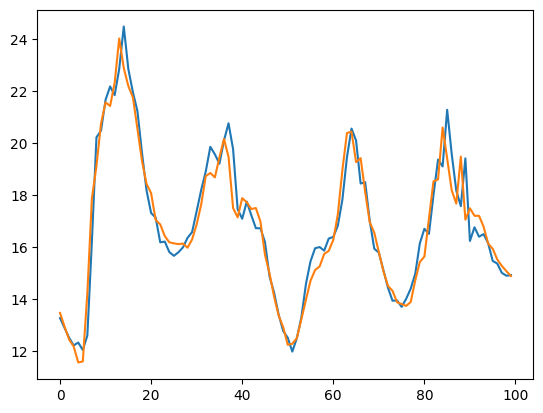

In [41]:
plot_predictions1(model4, X2_test, y2_test)

In [42]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [43]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [44]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [45]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [46]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [47]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [48]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [49]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [50]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [51]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.1435 - root_mean_squared_error: 0.3788

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1430 - root_mean_squared_error: 0.3782 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 2/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1643

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0269 - root_mean_squared_error: 0.1642 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0156 - root_mean_squared_error: 0.1250

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0968

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0797
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0820

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 6/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0761

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0731

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 8/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0718 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 9/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0711

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620


In [52]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.398076,0.412451,-0.789237,-0.793439
1,0.356507,0.353683,-0.777213,-0.763123
2,0.317353,0.323123,-0.743014,-0.721893
3,0.314991,0.250251,-0.690929,-0.652773
4,0.263649,0.254952,-0.605179,-0.652773
...,...,...,...,...
95,0.675802,0.716869,-0.413458,-0.416310
96,0.640242,0.687485,-0.416362,-0.399333
97,0.625739,0.663978,-0.402112,-0.399333
98,0.630011,0.641646,-0.391289,-0.400546


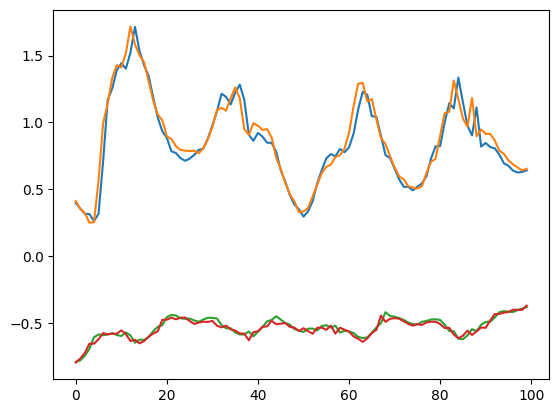

In [53]:
plot_predictions2(model5, X3_test, y3_test)

In [54]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [55]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.807701,12.93,982.464661,982.43
1,12.454029,12.43,982.563843,982.68
2,12.120911,12.17,982.845886,983.02
3,12.100808,11.55,983.275391,983.59
4,11.663995,11.59,983.982544,983.59
...,...,...,...,...
95,15.170601,15.52,985.563538,985.54
96,14.868055,15.27,985.539612,985.68
97,14.744664,15.07,985.657104,985.68
98,14.781009,14.88,985.746399,985.67


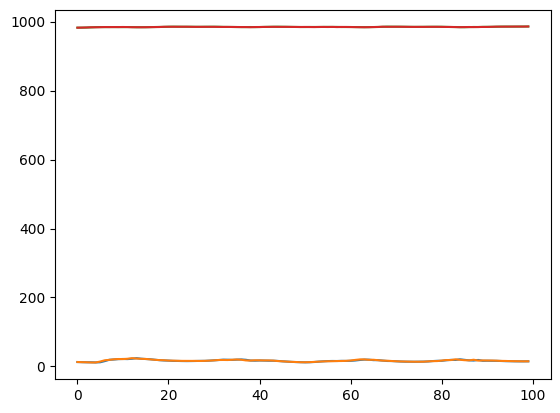

In [56]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

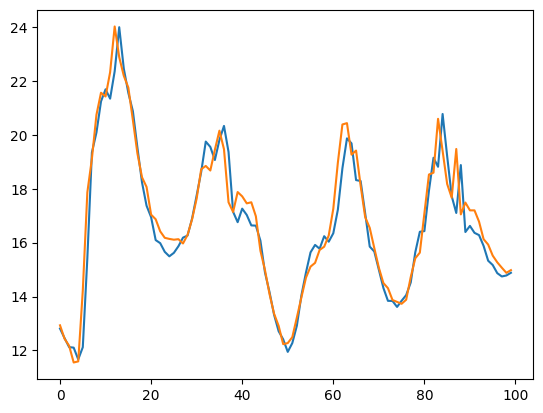

In [57]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

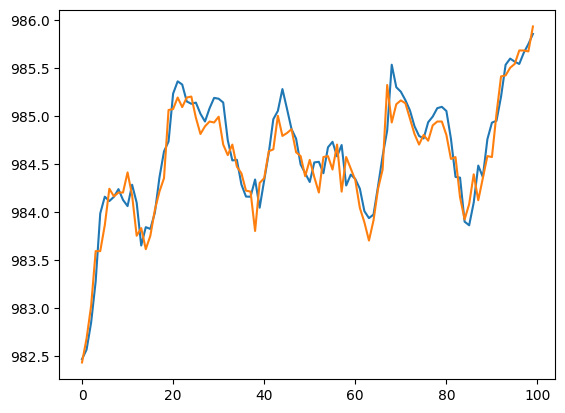

In [58]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [59]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [60]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [61]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.1817 - root_mean_squared_error: 0.4262

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 18s 8ms/step - loss: 0.1815 - root_mean_squared_error: 0.4260 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0336 - root_mean_squared_error: 0.1834

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.0336 - root_mean_squared_error: 0.1832 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1401

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0196 - root_mean_squared_error: 0.1400 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1139

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.0966

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0874

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0076 - root_mean_squared_error: 0.0874 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 7/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0816

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0777

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0060 - root_mean_squared_error: 0.0777 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0750

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 10/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0738

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 0.0054 - root_mean_squared_error: 0.0738 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641


In [62]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 3080      
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [63]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.1141 - root_mean_squared_error: 0.3377

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.1134 - root_mean_squared_error: 0.3367 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 2/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1347

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 3/10
1832/1875 [============================>.] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1037

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.0917

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0812
Epoch 5/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0861

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769
Epoch 6/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0823

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0068 - root_mean_squared_error: 0.0823 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 7/10
1850/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0797

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0063 - root_mean_squared_error: 0.0797 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 8/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.0061 - root_mean_squared_error: 0.0779 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0738
Epoch 9/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0764

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 10/10
1839/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0755

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0057 - root_mean_squared_error: 0.0754 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0674
